<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
<h2>Mentoría: Clasificación diagnóstica de mamografías </h2>
</center>

<h3>Práctico V - Clustering<h3>

<h4>Integrantes: Mario Agustín Sgró, Lucía Benítez y Carolina Díaz<h4>

**Objetivo y alcance:** 
    Explorar y falimiarizarce con técnicas de Clustering
    
**Método:** Técnicas de clustering, tabla de contingencia, medida inercia, silouette y medida de pureza para evaluación.(https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

**Estructura del informe:** 
Presentar en un archivo jupyter notebook con la resolución detallada de las siguientes consignas:

    1. Considerar la base sin la variable acr (target)
    2. Realizar una técnica de clustering (puede ser k-medias) con la base completa sin la variable target (acr), considerando k = 2, 3, 4, 5 y 6 clases, elegir dos cantidades que consideren más adecuada.
    3. Dividir a la base en 3 subconjuntos de variables (pueden ser DF, dcm, y otras), realizar las mismas técnicas de cluster a cada subconjunto.  
    4. Evaluar y comparar los resultados de los puntos 2 y 3 utilizando varios métodos incluídos la Tabla de contingencia y la cantidad de mamografías en cada clase o cluster encontrado, para ver la proporción de cada clase con respecto al resto, notando que tener una clase mayoritaria significativamente más grande que el resto es una clara evidencia de que no ha sido una buena división en clusters. Incluir también en la evaluación la medida de pureza (se usa para esto último algunos datos etiquetados con acr) se emulando con esta situación conocimiento de dominio.

In [4]:
import pandas as pd
from scipy import stats
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
import string

%pylab inline
plt.rcParams['figure.figsize'] = (10, 10)

Populating the interactive namespace from numpy and matplotlib


In [5]:
if sns.__version__ != '0.9.0':
    print('Atención! utilizamos seaborn versión 0.9.0')

In [6]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 1000

# Carga del DataSet

In [7]:
dataframe = pd.read_csv('datos/KnnFilled_data.csv',sep=',',index_col=['Imagen'])

## Descripción de la base de datos:

In [8]:
dataframe.head(3)

,Age,View,Laterality,Dcm_1,Dcm_2,Dcm_3,Dcm_4,Dcm_5,Dcm_6,Dcm_8,Dcm_9,Dcm_10,Dcm_11,Dcm_12,Dcm_13,Dcm_14,Dcm_17,Dcm_18,Dcm_19,Dcm_20,Dcm_21,Dcm_22,Dcm_23,Area,Promedio,Media,Desvio,Asimetria,Kurtosis,Moda,Desvio_L1,Desvio_L2,Desvio_L3,Asimetria_L1,Asimetria_L2,Asimetria_L3,promGradiente,Relacion,Relacion_L1,Relacion_L2,Relacion_L3,Relacion_L4,EP,EPBinaria,RelEntropia,Haralick_1,Haralick_2,Haralick_3,Haralick_4,Haralick_5,Haralick_6,Haralick_7,Haralick_8,Haralick_9,Haralick_10,Haralick_11,Haralick_12,Haralick_13,Haralick_14,Haralick_15,Haralick_16,Haralick_17,Haralick_18,Haralick_19,Haralick_20,Haralick_21,Haralick_22,Haralick_23,Haralick_24,Haralick_25,Haralick_26,Haralick_27,Haralick_28,Haralick_29,Haralick_30,Haralick_31,Haralick_32,Haralick_33,Haralick_34,Haralick_35,Haralick_36,Haralick_37,Haralick_38,Haralick_39,Haralick_40,Haralick_41,Haralick_42,Haralick_43,Haralick_44,Haralick_45,Haralick_46,Haralick_47,Haralick_48,Haralick_49,Haralick_50,Haralick_51,Haralick_52,DF1,DF2,DF3,DF4,DF5,DF6,DF7,DF8,DF9,DF10,DF11,DF12,DF13,DF14,DF15,DF16,DF17,DF18,DF19,DF20,DF21,DF22,DF23,DF24,DF25,DF26,DF27,DF28,DF29,DF30,DF31,DF32,DF33,DF34,DF35,DF36,DF37,DF38,DF39,DF40,DF41,DF42,DF43,DF44,DF45,DF46,DF47,DF48,DFb1,DFb2,DFb3,DFb4,DFb5,DFb6,DFb7,DFb8,DFb9,DFb10,DFb11,DFb12,DFb13,DFb14,DFb15,DFb16,DFb17,DFb18,DFb19,DFb20,DFb21,DFb22,DFb23,DFb24,DFb25,DFb26,DFb27,DFb28,DFb29,DFb30,DFb31,DFb32,DFb33,DFb34,DFb35,DFb36,DFb37,DFb38,DFb39,DFb40,DFb41,DFb42,DFb43,DFb44,DFb45,DFb46,DFb47,DFb48,ACR
Imagen,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Imagen_0.npy,47,CC,R,29,130,155,1115,RHODIUM,0.05,TUNGSTEN,54,58.5,700,621,1.073,-8.4,321,6.53,0.0172,0.531,2047,4096,NO,1906717.0,1204.432,1108.0,651.4016,0.631631,-0.158630,771,582.4619,617.4143,571.6266,1.254898,0.340503,0.478727,26.26389,50.87242,30.24690,39.02587,57.28405,56.46259,0.769471,0.176043,0.012500,0.000003,29632.09,0.965015,423492.9,0.010546,2407.881,1664340.0,12.23707,18.93313,8.625112e-07,8.446691,-0.209392,0.994013,0.000002,35926.62,0.957571,423372.4,0.009612,2407.639,1657563.0,12.23560,19.05275,7.760232e-07,8.586088,-0.198048,0.992383,0.000003,30038.18,0.964600,424267.4,0.010677,2408.827,1667031.0,12.23821,18.94111,8.581286e-07,8.455624,-0.208819,0.993943,0.000002,35106.38,0.958552,423500.1,0.009655,2407.789,1658894.0,12.23603,19.04234,7.841840e-07,8.570271,-0.199065,0.992547,1.304171,0.026670,226.2788,41.33949,-0.004142,-0.801469,1.739567,0.322655,571.4892,158.3410,-1.165407,-0.038599,1.770398,0.299554,1114.8870,161.6702,-1.183844,0.085194,1.720933,0.239347,1706.529,189.6891,-1.103810,0.225300,1.563104,0.110528,2449.700,306.2983,1.157895,1.152985,1.748927,0.349874,1941.302,416.6666,0.676891,0.995952,1.852387,0.649428,1560.111,524.6931,0.226560,0.823606,1.911039,0.972917,1231.635,639.3401,-0.129694,0.658866,1.347935,0.041248,303.0675,57.46704,2.316524,0.466817,1.704150,0.247506,768.1626,262.7135,-0.122940,-0.589775,1.798841,0.421929,1148.854,337.0629,-0.678163,0.150996,1.751035,0.341997,1627.667,380.1404,-0.268313,0.277035,1.569299,0.124358,2030.373,254.0663,8.731229,-1.076601,1.679952,0.224516,1405.837,235.7887,5.110653,-0.352031,1.663799,0.207258,867.1065,193.9527,14.221940,0.852135,1.362630,0.046754,334.1525,266.1445,42.72726,5.647393,c
Imagen_1.npy,47,MLO,R,28,100,115,1102,RHODIUM,0.05,TUNGSTEN,47,86.0,700,628,1.073,-44.9,301,4.33,0.0126,0.519,2047,4096,NO,1993379.0,1095.675,966.0,617.9254,0.822188,0.159056,771,577.9997,630.1512,590.6332,1.092861,0.499981,0.421337,26.20456,50.05200,35.61213,48.70387,58.67281,50.21066,0.771289,0.165031,0.053571,0.000003,40089.94,0.947479,381659.3,0.008924,2191.234,1486547.0,12.11379,18.84358,7.420714e-07,8.663215,-0.180066,0.987916,0.000003,48232.54,0.936822,381719.3,0.008153,2191.125,1478644.0,12.11180,18.95654,6.710952e-07,8.795995,-0.169177,0.984837,0.000003,39645.09,0.948079,381785.4,0.009185,2191.270,

In [9]:
print("El data set consiste de ",dataframe.shape[0]," imagenes, con ",dataframe.shape[1]," registros cada una.")

El data set consiste de  6605  imagenes, con  194  registros cada una.


In [10]:
dataframe['Dcm_6'] = dataframe['Dcm_6'].astype('category')
dataframe['Dcm_13'] = dataframe['Dcm_13'].astype('category')
dataframe['Dcm_11'] = dataframe['Dcm_11'].astype('category')
dataframe['Dcm_21'] = dataframe['Dcm_21'].astype('category')
dataframe['Dcm_22'] = dataframe['Dcm_22'].astype('category')

## Tipos de Variables

In [11]:
CatFeat = [x for x in dataframe.columns if dataframe[x].dtype == 'object']
NumFeat = [x for x in dataframe.columns if dataframe[x].dtype == 'float64']
IntFeat = [x for x in dataframe.columns if dataframe[x].dtype == 'int64']

print('Cantidad' + str('\n')+
      '   variables numéricas   ' + str(len(NumFeat)) + str('\n') +
      '   variables enteras     ' + str(len(IntFeat)) + str('\n') +
      '   variables categóricas ' + str(len(CatFeat)))

Cantidad
   variables numéricas   174
   variables enteras     9
   variables categóricas 6


In [12]:
CatFeat = [x for x in dataframe.columns if dataframe[x].dtype.name == 'category']
NumFeat = [x for x in dataframe.columns if dataframe[x].dtype.name != 'category']

print('Cantidad' + str('\n')+
      '   variables numéricas     '+ str(len(NumFeat)) + str('\n')
      + '   variables discretas  ' + str(len(CatFeat)))

Cantidad
   variables numéricas     189
   variables discretas  5


Transformamos las variables categóricas con palabras en numéricas

In [13]:
data = dataframe.copy()

In [14]:
for cat in CatFeat:
    data[cat] = data[cat].cat.codes

In [15]:
All_features = [x for x in data.columns if data[x].dtypes == 'float64']
Dicom_features = [x for x in data.columns if ('Dcm_' in x and data[x].dtypes == 'float64')]
Haralick_features = [x for x in data.columns if ('Haralick_' in x and data[x].dtypes == 'float64')]
DFb_features = [x for x in data.columns if ('DFb' in x and data[x].dtypes == 'float64')]
DF_features = [x for x in data.columns if ( not(x in DFb_features) and 'DF' in x and data[x].dtypes == 'float64')]
Others_features = [x for x in data.columns if ((data[x].dtypes == 'float64') and (not(x in Dicom_features) and not(x in DFb_features) and not(x in Haralick_features) and  not(x in DF_features)))]

 1. Considerar la base sin la variable acr (target)
 2. Realizar una técnica de clustering (puede ser k-medias) con la base completa sin la variable target (acr), considerando k = 2, 3, 4, 5 y 6 clases, elegir dos cantidades que consideren más adecuada.

In [ ]:
from sklearn.preprocessing import StandardScaler


y = data["ACR"]
#X = data[["DF13","DF14","DF16","DF35","DF36","DF40","DF41","DF42","DF46"]]
#X = data[["Haralick_1","Haralick_2","Haralick_3","Haralick_4", "Haralick_5","Haralick_6","Haralick_7"]]
#X=data[Others_features[1:6]]
X=data[Others_features[13:23]]

X = StandardScaler().fit_transform(X)

# Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

Para jugar empezamos a tomar las variables DF que están más correlacionadas con los targets


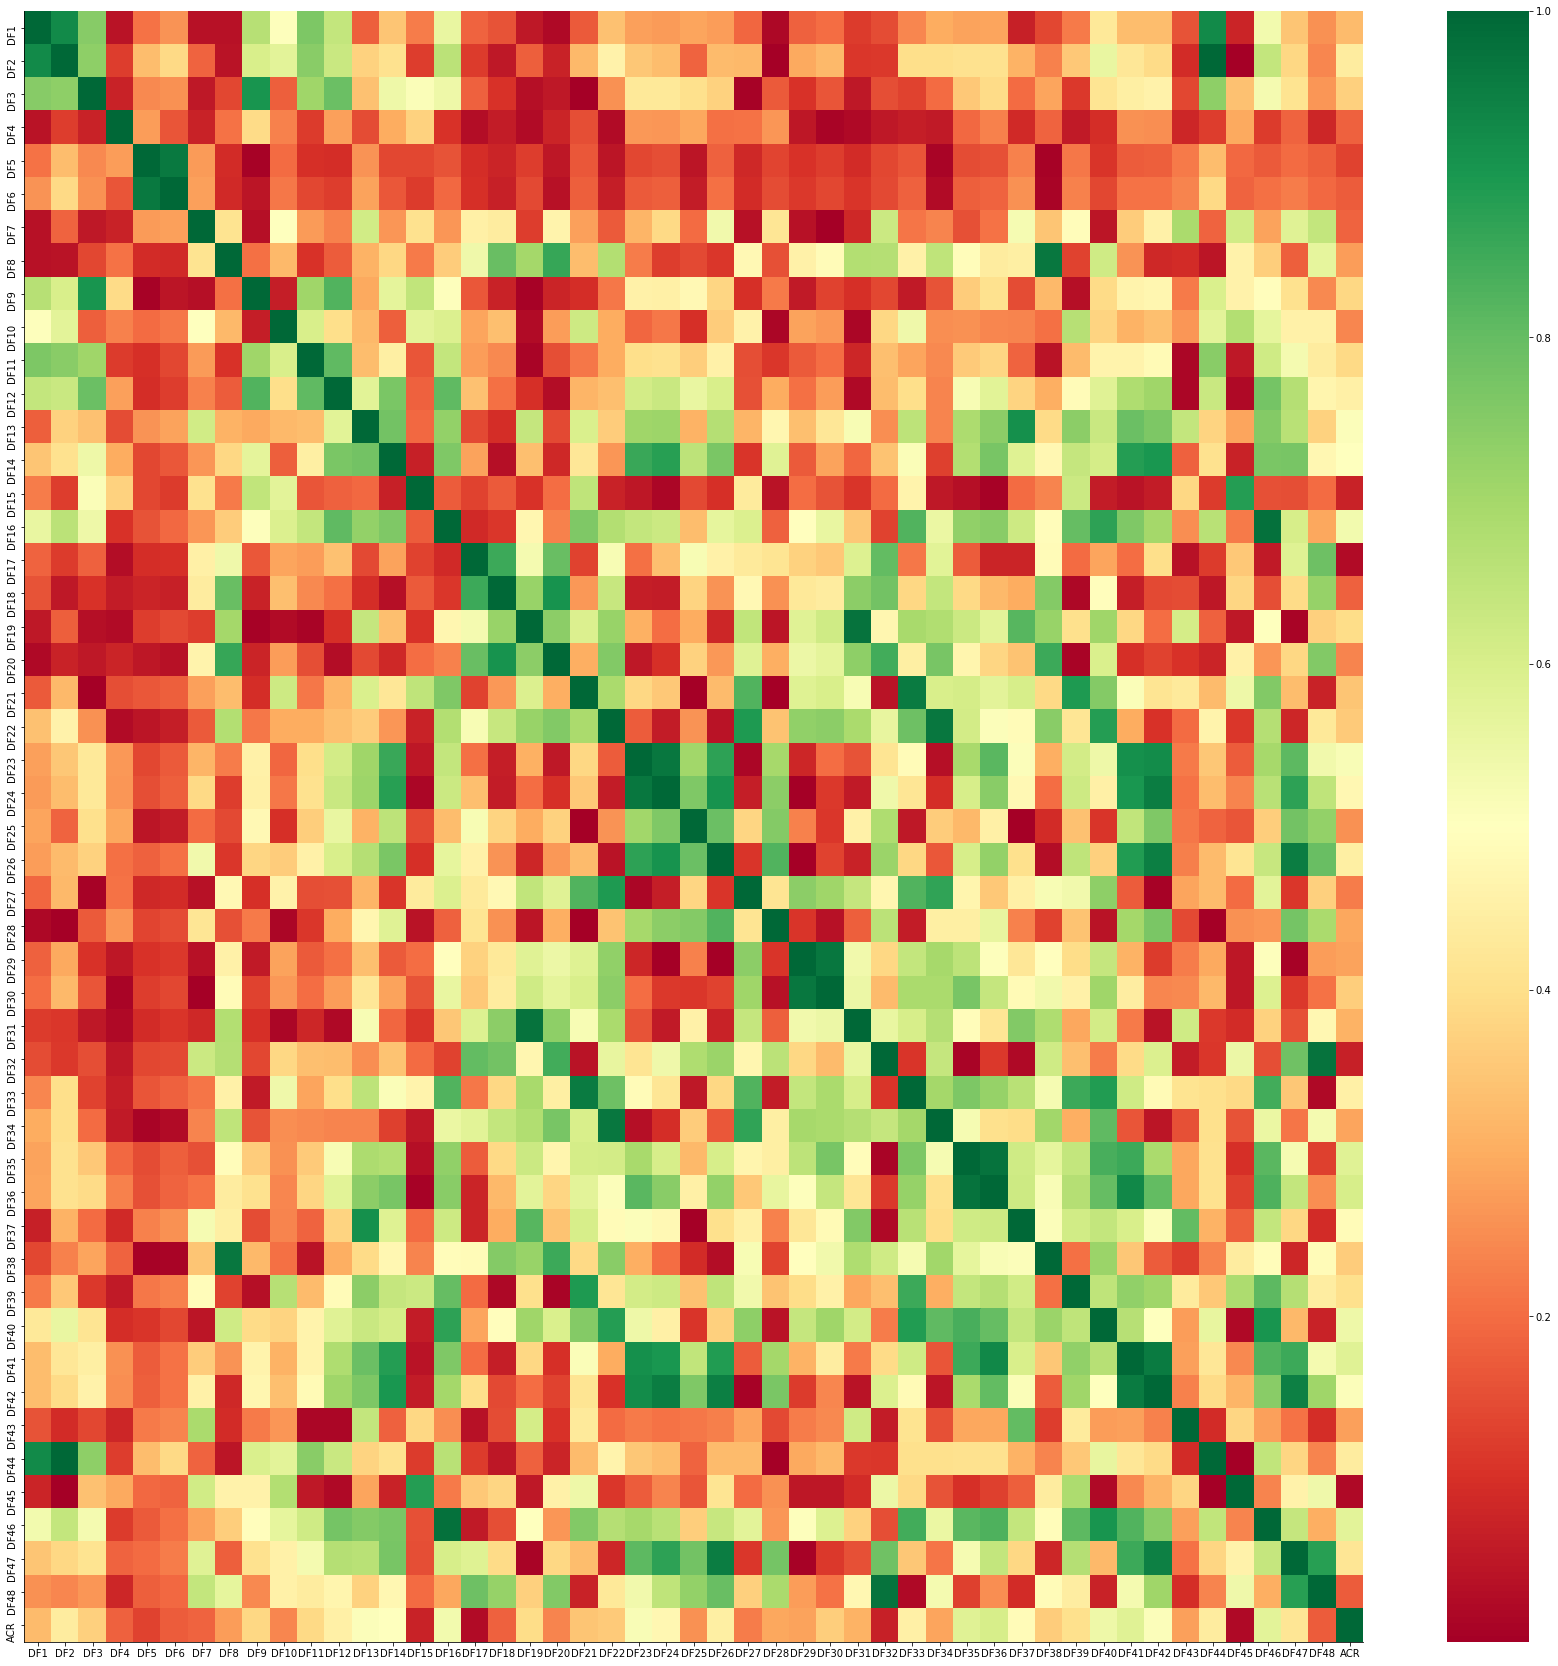

In [16]:
DF_features.append("ACR")

data["ACR"] = data["ACR"].astype("category").cat.codes

corr = data[DF_features].corr(method='spearman').abs()
f,ax = plt.subplots(1,1,figsize=(30,30))
sns.heatmap(corr,annot=False,cmap="RdYlGn",ax=ax)
sns.despine()

In [16]:
from sklearn.preprocessing import StandardScaler


y = data["ACR"]
#X = data[["DF13","DF14","DF16","DF35","DF36","DF40","DF41","DF42","DF46"]]
#X = data[["Haralick_1","Haralick_2","Haralick_3","Haralick_4", "Haralick_5","Haralick_6","Haralick_7"]]
#X=data[Others_features[1:6]]
X=data[Others_features[13:23]]

X = StandardScaler().fit_transform(X)

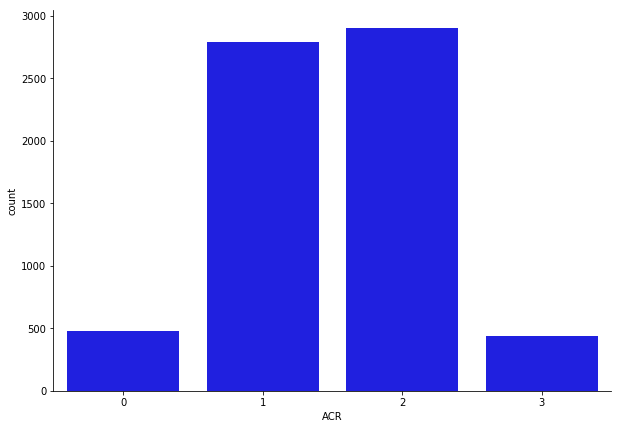

In [17]:
plt.figure(figsize=(10,7))
sns.countplot(y, color='blue')
sns.despine()

In [18]:
from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture

In [19]:
params = {'quantile': .3,
          'n_neighbors': 10,
          'min_samples': 20,
          'xi': 0.05,
          'min_cluster_size': 0.1,
          'n_clusters':4}

In [20]:
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [21]:
ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward',connectivity=connectivity)
gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')
spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
model=ward

In [22]:
#ward.fit(X)
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=<6605x6605 sparse matrix of type '<class 'numpy.float64'>'
	with 90572 stored elements in Compressed Sparse Row format>,
                        distance_threshold=None, linkage='ward', memory=None,
                        n_clusters=4, pooling_func='deprecated')

In [23]:
from itertools import cycle, islice

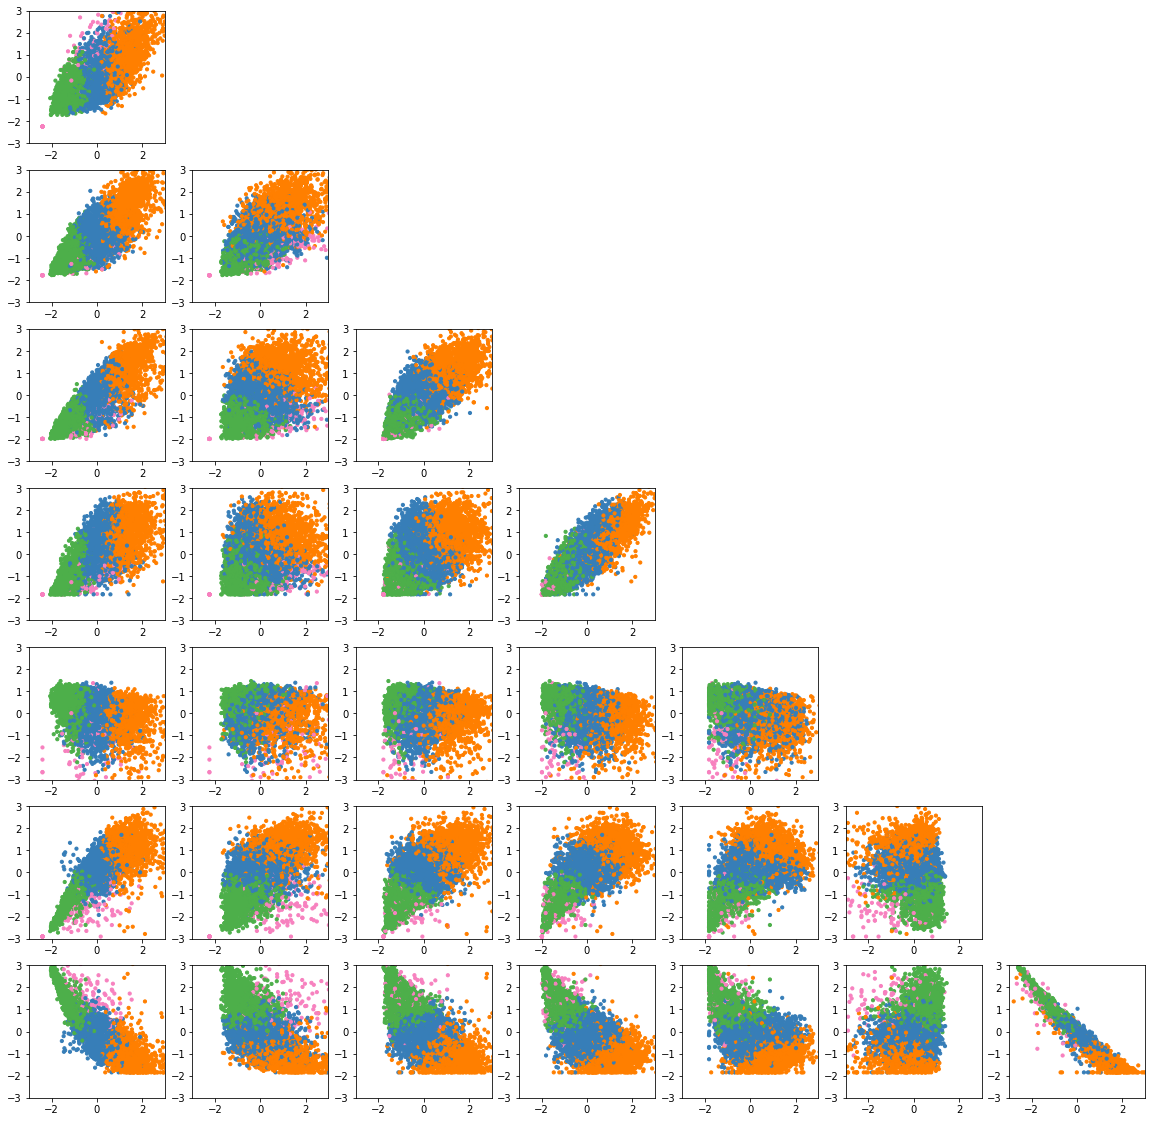

In [24]:
y_pred = model.labels_.astype(np.int)
#y_pred model.predict(X)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

n_vars = X.shape[1]


fig, axs = plt.subplots(nrows=n_vars-1, ncols=n_vars-1, figsize=(20, 20))

for ax in axs.flat:
    ax.set_axis_off()

for i in range(n_vars):
    for j in range(i+1,n_vars):
        ax.set_axis_on()
        
        ax = axs[j-1,i]
        ax.scatter(X[:,i], X[:,j], s=10, color=colors[y_pred])

        ax.set_xlim(-3.0, 3.0)
        ax.set_ylim(-3.0, 3.0)

In [25]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [204]:
from sklearn.preprocessing import StandardScaler

y = data["ACR"]
#X=data[Others_features[1:6]]
X=data[Others_features[6:13]]
#X = data[["DF13","DF14","DF16","DF35","DF36","DF40","DF41","DF42","DF46"]]
#X = data[Dicom_features] 
#X = data[["Haralick_1","Haralick_2","Haralick_3","Haralick_4", "Haralick_5","Haralick_6","Haralick_7"]]
#X = data[["Haralick_8","Haralick_9","Haralick_10","Haralick_11","Haralick_12","Haralick_13"]]
#X = data[["DF13","DF14","DF16","DF35","DF36","DF40","DF41","DF42","DF46"]]

#DFb_features 
#DF_features  
#Others_features 
X = StandardScaler().fit_transform(X)

In [27]:
#purity_score(y, y_pred)

metrics.cluster.contingency_matrix(y, y_pred)

array([[  80,   20,  375,    3],
       [1241,  446, 1031,   73],
       [1436, 1046,  359,   57],
       [ 186,  174,   52,   26]])

In [207]:
from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture

In [208]:
params = {'quantile': .5,
          'eps': .3,
          'n_neighbors': 15,
          'min_samples': 20,
          'xi': 0.05,
          'min_cluster_size': 0.1,
          'n_clusters':4}

In [209]:
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [210]:
#ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward',connectivity=connectivity)
#gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')
dbscan = cluster.DBSCAN(eps=params['eps'])


In [211]:
#ward.fit(X)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [212]:
from itertools import cycle, islice

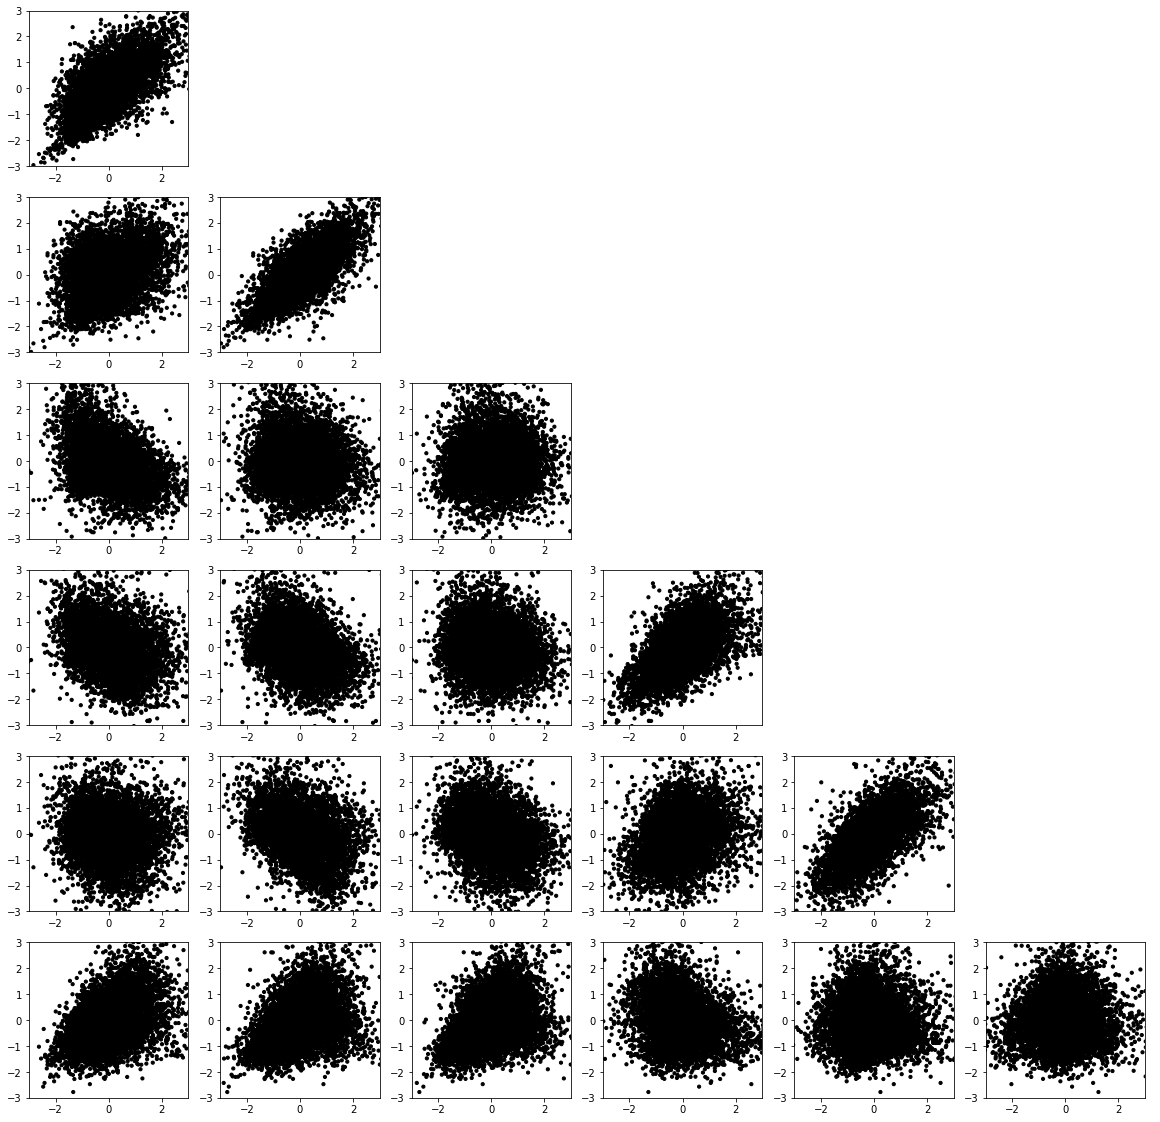

In [215]:
#y_pred = ward.labels_.astype(np.int)
#y_pred = gmm.predict(X)
y_pred = dbscan.labels_.astype(np.int)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

n_vars = X.shape[1]


fig, axs = plt.subplots(nrows=n_vars-1, ncols=n_vars-1, figsize=(20, 20))

for ax in axs.flat:
    ax.set_axis_off()

for i in range(n_vars):
    for j in range(i+1,n_vars):
        ax.set_axis_on()
        
        ax = axs[j-1,i]
        ax.scatter(X[:,i], X[:,j], s=10, color=colors[y_pred])

        ax.set_xlim(-3.0, 3.0)
        ax.set_ylim(-3.0, 3.0)

In [136]:
from sklearn.preprocessing import StandardScaler

y = data["ACR"]
#X = data[Dicom_features] 


#DFb_features 
#DF_features  
#Others_features 

X = StandardScaler().fit_transform(X)

In [137]:
from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture

In [138]:
params = {'quantile': .5,
          'eps': .3,
          'n_neighbors': 15,
          'min_samples': 20,
          'xi': 0.05,
          'min_cluster_size': 0.1,
          'n_clusters':4}

In [139]:
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [140]:
#ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward',connectivity=connectivity)
#gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')
dbscan = cluster.DBSCAN(eps=params['eps'])

In [141]:
#ward.fit(X)
#gmm.fit(X)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [142]:
from itertools import cycle, islice

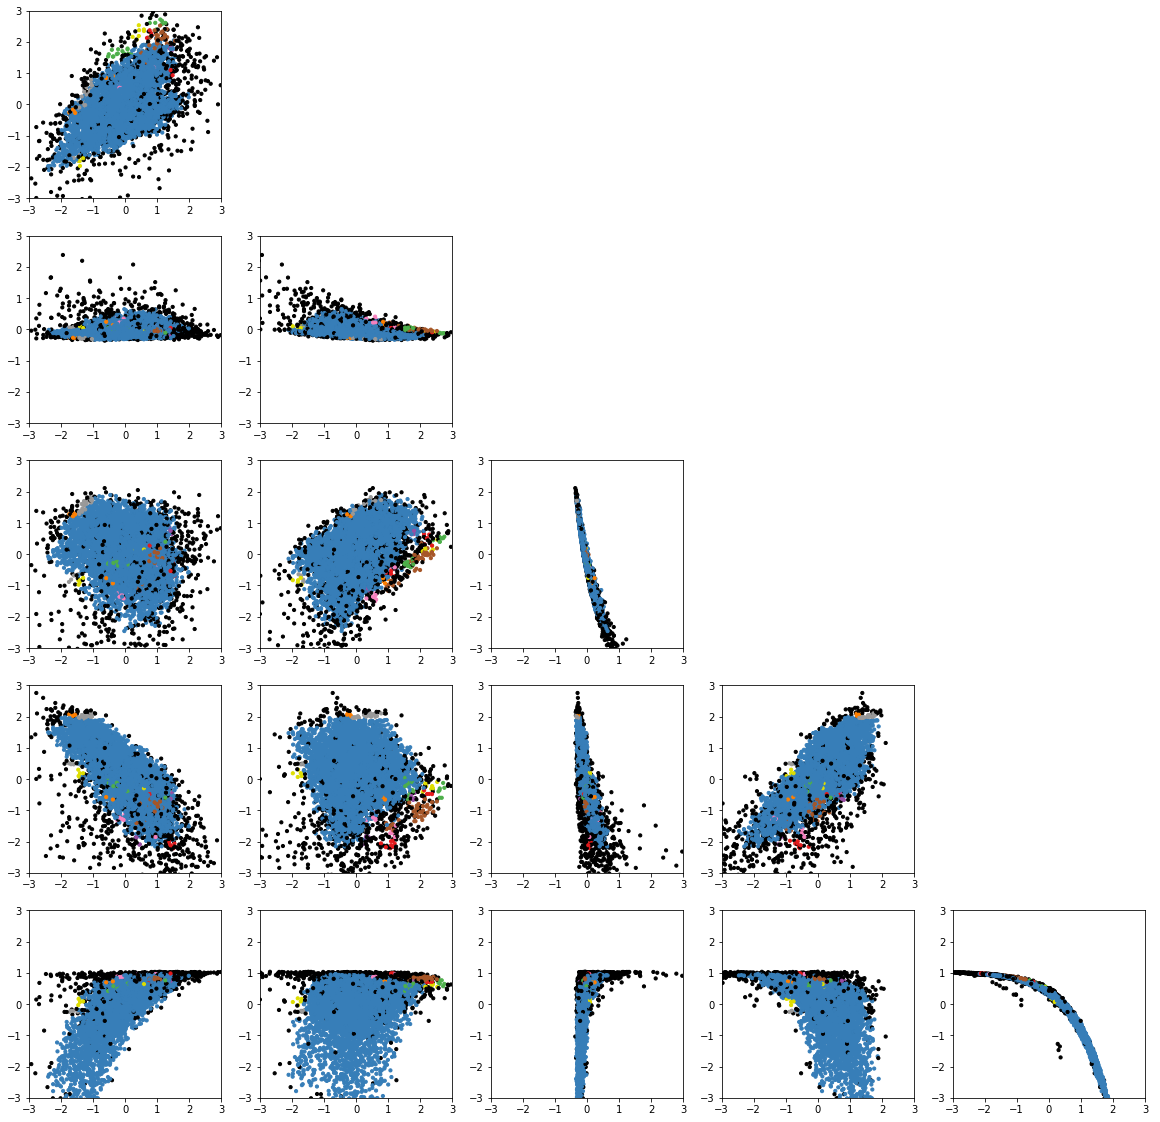

In [143]:
#y_pred = ward.labels_.astype(np.int)
#y_pred = gmm.predict(X)
y_pred = dbscan.labels_.astype(np.int)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

n_vars = X.shape[1]


fig, axs = plt.subplots(nrows=n_vars-1, ncols=n_vars-1, figsize=(20, 20))

for ax in axs.flat:
    ax.set_axis_off()

for i in range(n_vars):
    for j in range(i+1,n_vars):
        ax.set_axis_on()
        
        ax = axs[j-1,i]
        ax.scatter(X[:,i], X[:,j], s=10, color=colors[y_pred])

        ax.set_xlim(-3.0, 3.0)
        ax.set_ylim(-3.0, 3.0)

In [112]:
from sklearn.preprocessing import StandardScaler

y = data["ACR"]
#X = data[Dicom_features] 
X = data[["Haralick_9","Haralick_10","Haralick_11","Haralick_12", "Haralick_13"]]

#DFb_features 
#DF_features  
#Others_features 

X = StandardScaler().fit_transform(X)

In [113]:
from sklearn.neighbors import kneighbors_graph
from sklearn import cluster, mixture

In [114]:
params = {'quantile': .5,
          'n_neighbors': 15,
          'min_samples': 20,
          'xi': 0.05,
          'min_cluster_size': 0.1,
          'n_clusters':4}

In [115]:
bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])
connectivity = kneighbors_graph(X, n_neighbors=params['n_neighbors'], include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [116]:
#ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage='ward',connectivity=connectivity)
gmm = mixture.GaussianMixture(n_components=params['n_clusters'], covariance_type='full')

In [117]:
#ward.fit(X)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [118]:
from itertools import cycle, islice

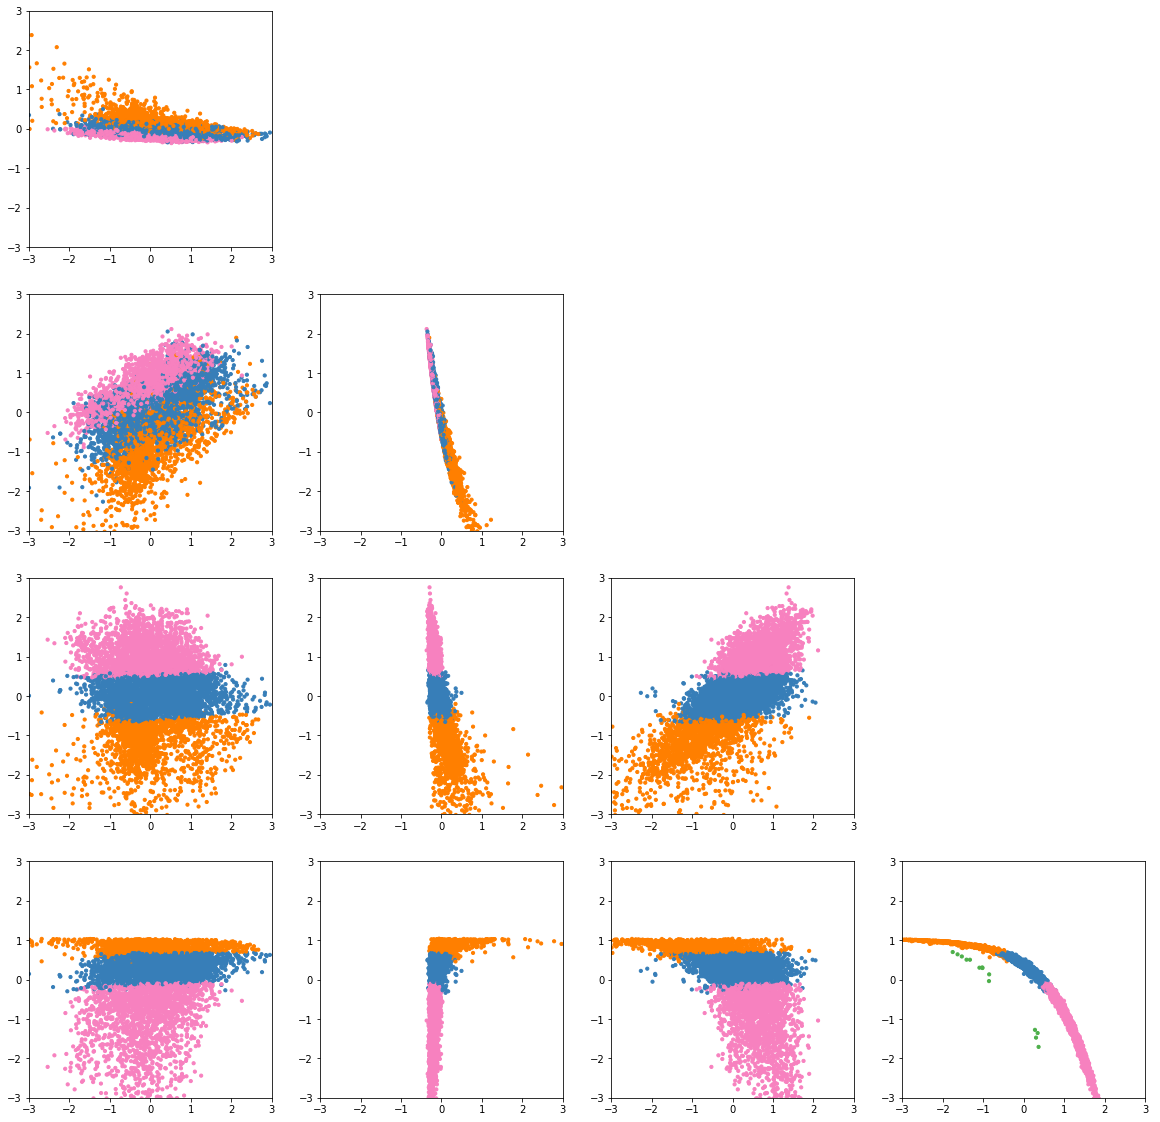

In [119]:
#y_pred = ward.labels_.astype(np.int)
y_pred = gmm.predict(X)

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

n_vars = X.shape[1]


fig, axs = plt.subplots(nrows=n_vars-1, ncols=n_vars-1, figsize=(20, 20))

for ax in axs.flat:
    ax.set_axis_off()

for i in range(n_vars):
    for j in range(i+1,n_vars):
        ax.set_axis_on()
        
        ax = axs[j-1,i]
        ax.scatter(X[:,i], X[:,j], s=10, color=colors[y_pred])

        ax.set_xlim(-3.0, 3.0)
        ax.set_ylim(-3.0, 3.0)